# Filter Warnings

In [1]:
from warnings import filterwarnings
filterwarnings("ignore")

# Read Dataset

In [2]:
import pandas as pd
A=pd.read_csv("C:/Users/saurabh firke/Downloads/training_set_hl.csv")

# Preview

In [3]:
A.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849.0,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,NaN,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,Y


# Missing Data Treatment

In [4]:
A.isna().sum()

Loan_ID               0
Gender               15
Married               3
Dependents           15
Education             1
Self_Employed        32
ApplicantIncome       2
CoapplicantIncome     1
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [5]:
for i in A.columns:
    if(A[i].dtypes=="object"):
        x=A[i].mode()[0]
        A[i]=A[i].fillna(x)
    else:
        x=A[i].mean()
        A[i]=A[i].fillna(x)

In [6]:
A.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# Define X and Y

In [7]:
Y=A[["Loan_Status"]]
X=A.drop(labels=["Loan_Status","Loan_ID"],axis=1)

# Devide Data In Cat And Con

In [8]:
cat=[]
con=[]
for i in X.columns:
    if(X[i].dtypes=="object"):
        cat.append(i)
    else:
        con.append(i)

In [9]:
cat

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area']

In [10]:
con

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

# Anova

In [11]:
def ANOVA(df,cat,con):
    from statsmodels.formula.api import ols
    relation= con + "~" +cat
    model=ols(relation,df).fit()
    from statsmodels.stats.anova import anova_lm
    anova_results=anova_lm(model)
    return round(anova_results.iloc[0,4],4)

In [12]:
for i in con:
    print("-------","Loan_Status vs","-------")
    print(ANOVA(A,"Loan_Status",i))

------- Loan_Status vs -------
0.9025
------- Loan_Status vs -------
0.1424
------- Loan_Status vs -------
0.3677
------- Loan_Status vs -------
0.604
------- Loan_Status vs -------
0.0


# Chisquare 

In [13]:
def chisq(df,cat1,cat2):
    from scipy.stats import chi2_contingency
    ct=pd.crosstab(df[cat1],df[cat2])
    a,b,c,d=chi2_contingency(ct)
    return b

In [14]:
for i in cat:
    print("-------","Loan_Status vs","-------")
    print(chisq(A,"Loan_Status",i))

------- Loan_Status vs -------
0.7391461310869638
------- Loan_Status vs -------
0.029608580862582116
------- Loan_Status vs -------
0.3688663081366005
------- Loan_Status vs -------
0.04309962129357355
------- Loan_Status vs -------
0.9710746411403309
------- Loan_Status vs -------
0.0021360187811644915


# Outliers

In [15]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()

In [16]:
ss.fit(X[con])

StandardScaler()

In [17]:
X1=pd.DataFrame(ss.transform(X[con]),columns=con)

In [18]:
X1.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,0.072651,-0.554368,0.000000,0.279851,0.45164
1,0.000000,-0.038610,-0.219273,0.279851,0.45164
2,-0.394096,-0.554368,-0.957641,0.279851,0.45164
3,-0.462412,0.252103,-0.314547,0.279851,0.45164
4,0.097389,-0.554368,-0.064454,0.279851,0.45164


In [19]:
from pm6 import outliers
OL=outliers(X1)

In [20]:
OL

[9,
 14,
 68,
 94,
 126,
 130,
 133,
 155,
 171,
 177,
 183,
 185,
 242,
 262,
 278,
 308,
 313,
 333,
 369,
 402,
 409,
 417,
 432,
 443,
 487,
 495,
 497,
 506,
 523,
 525,
 546,
 561,
 575,
 581,
 585,
 600,
 604]

In [21]:
X=X.drop(index=OL,axis=0)
Y=Y.drop(index=OL,axis=0)

In [22]:
X.index=range(0,X.shape[0])
Y.index=range(0,Y.shape[0])

In [23]:
X.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,No,0,Graduate,No,5849.00000,0.0,146.412162,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,5405.54085,1508.0,128.000000,360.0,1.0,Rural
2,Male,Yes,0,Graduate,Yes,3000.00000,0.0,66.000000,360.0,1.0,Urban
3,Male,Yes,0,Not Graduate,No,2583.00000,2358.0,120.000000,360.0,1.0,Urban
4,Male,No,0,Graduate,No,6000.00000,0.0,141.000000,360.0,1.0,Urban


In [24]:
Y.head()

,Loan_Status
0,Y
1,N
2,Y
3,Y
4,Y


# Preprocessing

In [25]:
from pm6 import preprocessing   ##preprocessing through a function
Xnew=preprocessing(X)

In [26]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
Ynew=pd.DataFrame(le.fit_transform(Y),columns=["Loan_Status"])

# Train Test Split

In [27]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Ynew,test_size=0.2,random_state=21)

# Train The Model

In [28]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD

In [29]:
#Xnew.shape

In [30]:
from keras.callbacks import EarlyStopping
es=EarlyStopping(patience=7,monitor="val_accuracy")

nn=Sequential()
nn.add(Dense(100,input_dim=20))
nn.add(Dense(1,activation="sigmoid"))
nn.compile(loss="binary_crossentropy",metrics=["accuracy"])
model=nn.fit(Xnew,Ynew,validation_split=0.2,epochs=50,callbacks=es)

Epoch 1/50
15/15 [==============================] - 0s 27ms/step - loss: 0.5885 - accuracy: 0.7158 - val_loss: 0.5131 - val_accuracy: 0.8017
Epoch 2/50
15/15 [==============================] - 0s 2ms/step - loss: 0.5114 - accuracy: 0.8026 - val_loss: 0.4866 - val_accuracy: 0.8276
Epoch 3/50
15/15 [==============================] - 0s 1ms/step - loss: 0.4827 - accuracy: 0.8178 - val_loss: 0.4649 - val_accuracy: 0.8276
Epoch 4/50
15/15 [==============================] - 0s 1ms/step - loss: 0.4672 - accuracy: 0.8134 - val_loss: 0.4596 - val_accuracy: 0.8362
Epoch 5/50
15/15 [==============================] - 0s 1ms/step - loss: 0.4562 - accuracy: 0.8178 - val_loss: 0.4629 - val_accuracy: 0.8190
Epoch 6/50
15/15 [==============================] - 0s 2ms/step - loss: 0.4509 - accuracy: 0.8134 - val_loss: 0.4628 - val_accuracy: 0.8276
Epoch 7/50
15/15 [==============================] - 0s 1ms/step - loss: 0.4489 - accuracy: 0.8178 - val_loss: 0.4620 - val_accuracy: 0.8276
Epoch 8/50
15/15 [=

In [31]:
model.history

{'loss': [0.5884853005409241,
  0.5114338397979736,
  0.48274049162864685,
  0.46715453267097473,
  0.45621567964553833,
  0.4508915841579437,
  0.4489184021949768,
  0.4438563883304596,
  0.445919394493103,
  0.44406670331954956,
  0.442775160074234],
 'accuracy': [0.7158351540565491,
  0.8026030659675598,
  0.8177874088287354,
  0.8134490251541138,
  0.8177874088287354,
  0.8134490251541138,
  0.8177874088287354,
  0.8177874088287354,
  0.8134490251541138,
  0.811279833316803,
  0.8177874088287354],
 'val_loss': [0.5130913257598877,
  0.4866120517253876,
  0.46489056944847107,
  0.45955732464790344,
  0.4628744423389435,
  0.4628315269947052,
  0.4620267152786255,
  0.46292418241500854,
  0.46637943387031555,
  0.47319430112838745,
  0.47888070344924927],
 'val_accuracy': [0.8017241358757019,
  0.8275862336158752,
  0.8275862336158752,
  0.8362069129943848,
  0.818965494632721,
  0.8275862336158752,
  0.8275862336158752,
  0.8275862336158752,
  0.8275862336158752,
  0.818965494632721

In [32]:
acc=model.history["accuracy"]

In [33]:
val_acc=model.history["val_accuracy"]

In [34]:
len(acc)

11

In [37]:
Q=range(0,11,1)

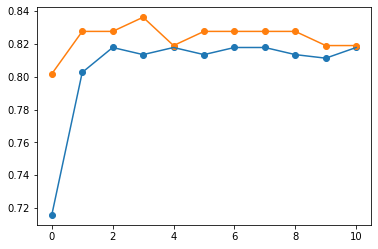

In [38]:
import matplotlib.pyplot as plt
plt.scatter(Q,acc)
plt.scatter(Q,val_acc)
plt.plot(Q,acc)
plt.plot(Q,val_acc)

# Getting Data Ready For Prediction

In [39]:
B=pd.read_csv("C:/Users/saurabh firke/Downloads/testing_set_hl.csv")

In [40]:
B.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [41]:
from pm6 import replacer
replacer(B)

In [42]:
B.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [43]:
cat=[]
con=[]
for i in B.columns:
    if(B[i].dtypes=="object"):
        cat.append(i)
    else:
        con.append(i)
    

In [44]:
B1=pd.DataFrame(ss.transform(B[con]),columns=con)
B2=pd.get_dummies(B[cat])
Bnew=B2.join(B1)

In [45]:
Bnew

,Loan_ID_LP001015,Loan_ID_LP001022,Loan_ID_LP001031,Loan_ID_LP001035,Loan_ID_LP001051,Loan_ID_LP001054,Loan_ID_LP001055,Loan_ID_LP001056,Loan_ID_LP001059,Loan_ID_LP001067,...,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0.051517,-0.554368,-0.433638,0.279851,0.451640
1,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,1,-0.381645,-0.041346,-0.243092,0.279851,0.451640
2,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,1,-0.066439,0.061259,0.733459,0.279851,0.451640
3,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,1,-0.502223,0.316402,-0.552730,0.279851,-0.047954
4,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,1,-0.348879,-0.554368,-0.814731,0.279851,0.451640
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,-0.228793,0.053392,-0.397911,0.279851,0.451640
363,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,-0.204383,-0.311879,-0.374092,0.279851,0.451640
364,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,-0.353139,0.127267,-0.243092,0.279851,-0.047954
365,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,-0.066439,0.264073,0.138001,0.279851,0.451640


In [46]:
ready_for_pred=Bnew[Xnew.columns]

In [47]:
ready_for_pred

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0.051517,-0.554368,-0.433638,0.279851,0.451640,0,1,0,1,1,0,0,0,1,0,1,0,0,0,1
1,-0.381645,-0.041346,-0.243092,0.279851,0.451640,0,1,0,1,0,1,0,0,1,0,1,0,0,0,1
2,-0.066439,0.061259,0.733459,0.279851,0.451640,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1
3,-0.502223,0.316402,-0.552730,0.279851,-0.047954,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1
4,-0.348879,-0.554368,-0.814731,0.279851,0.451640,0,1,1,0,1,0,0,0,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,-0.228793,0.053392,-0.397911,0.279851,0.451640,0,1,0,1,0,0,0,1,0,1,0,1,0,0,1
363,-0.204383,-0.311879,-0.374092,0.279851,0.451640,0,1,0,1,1,0,0,0,1,0,1,0,0,0,1
364,-0.353139,0.127267,-0.243092,0.279851,-0.047954,0,1,1,0,1,0,0,0,1,0,1,0,0,1,0
365,-0.066439,0.264073,0.138001,0.279851,0.451640,0,1,0,1,1,0,0,0,1,0,1,0,1,0,0


In [48]:
Final_pred=nn.predict(ready_for_pred)

In [49]:
Final_pred

array([[0.7701682 ],
       [0.7318955 ],
       [0.7936758 ],
       [0.7545787 ],
       [0.588209  ],
       [0.66238964],
       [0.75058484],
       [0.04311463],
       [0.8199315 ],
       [0.7636765 ],
       [0.57728463],
       [0.843086  ],
       [0.7353393 ],
       [0.14600942],
       [0.84113365],
       [0.6112466 ],
       [0.81136835],
       [0.85443956],
       [0.74357915],
       [0.94082725],
       [0.67971337],
       [0.7893975 ],
       [0.69525456],
       [0.57399094],
       [0.700636  ],
       [0.16859505],
       [0.70597696],
       [0.7023164 ],
       [0.8311689 ],
       [0.85579324],
       [0.7855468 ],
       [0.79161274],
       [0.8272438 ],
       [0.773649  ],
       [0.7955738 ],
       [0.06990179],
       [0.92163473],
       [0.80487275],
       [0.6662347 ],
       [0.6960295 ],
       [0.78691494],
       [0.713076  ],
       [0.8443954 ],
       [0.8096981 ],
       [0.7326678 ],
       [0.6476244 ],
       [0.63808334],
       [0.767

In [50]:
Q=[]
for i in Final_pred:
    if(i[0]>0.5):
        Q.append("Y")
    else:
        Q.append("N")

In [51]:
W=pd.DataFrame(B.Loan_ID)
W["Loan_Status"]=Q

In [52]:
W

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y
...,...,...
362,LP002971,Y
363,LP002975,Y
364,LP002980,Y
365,LP002986,Y


In [53]:
W.to_csv("C:/Users/saurabh firke/Downloads/loan_status_pred_dl.csv")

# This step will not work on all machines(version issue)
" nn.predict_classes " is not available in all versions

In [54]:
Q=[]
for i in nn.predict_classes(ready_for_pred):
    Q.append(i[0])

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [55]:
pred=le.inverse_transform(Q)

In [56]:
pred

array(['Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y',
       'Y', 'N', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'N', 'N', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'N', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N',
       'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y

In [57]:
W=pd.DataFrame(B.Loan_ID)
W["Loan_Status"]=pred

In [58]:
W

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y
...,...,...
362,LP002971,Y
363,LP002975,Y
364,LP002980,Y
365,LP002986,Y
